# lab1: Linear Regression

In [1]:
%matplotlib inline

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

## 1. warmUp
生成一个5x5单位矩阵

In [2]:
def warmUpExercise():
    return np.eye(5)

In [3]:
print(warmUpExercise())

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


## 2. Plotting
加载数据，进行数据的可视化

In [13]:
def plotData(X, y):
    plt.scatter(X,y,c='r')
    plt.xlabel('Population of City in 10,1000s')
    plt.ylabel('proflt in $10,1000s')

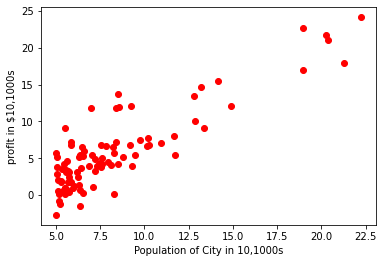

In [6]:
data = pd.read_csv('ex1data1.txt')
X  = np.array(data.iloc[:,0])
m = X.shape[0]
y = np.array(data.iloc[:,1]).reshape(m,1)
plotData(X, y)

## 3. Cost and Gradient descent
### 3.1 Cost Function
$$
h_\theta(x)=\theta^{T}x=\theta_0+\theta_1x_1
$$
$$
J(\theta)=\frac{1}{2m}\sum_i^m(h_\theta(x^{(i)})-y^{(i)})^2
$$

In [7]:
# 为x左边增加全1的列
X = np.vstack((np.ones(m), X))
X = np.transpose(X)

In [8]:
def computeCost(X, y, theta):
    """
    X.shape = (m,2)
    y.shape = (m,1)
    theta.shape = (2,1)
    """
    m = X.shape[0]
    h = np.dot(X, theta)
    return np.sum(np.square(h - y)) / (2*m)

In [9]:
# test, given theta=[0;0]
print(computeCost(X, y, np.zeros((2,1))))
# test, given theta=[-1;2]
print(computeCost(X, y, np.array([[-1], [2]])))

30.79495785534583
54.596023180575


### 3.2 Gradient Descent
$$
\theta_j=\theta_j-\alpha\frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})x^{(i)}_j
$$

In [10]:
def gradientDescent(X, y, theta, alpha, iteratons):
    """
    X.shape = (m,2)
    y.shape = (m,1)
    theta.shape = (2,1)
    alpha: learning rate
    iterations: num of iterate
    """
    m = X.shape[0]
    J_history = np.zeros((iteratons, 1))
    for iter in range(iteratons):
        h = np.dot(X, theta)
        tmp = np.sum((h-y)*X, axis=0).reshape(2,1)
        theta = theta - alpha/m * tmp
        J_history[iter] = computeCost(X,y,theta)
    return J_history, theta 

In [19]:
theta = np.zeros((2,1))
iterations = 1500
alpha = 0.01
J_history, theta = gradientDescent(X, y, theta, alpha, iterations)
J_history, theta

(array([[5.90146939],
        [5.14906372],
        [5.12066681],
        ...,
        [3.46704693],
        [3.46701999],
        [3.46699315]]),
 array([[-3.92643901],
        [ 1.1849957 ]]))

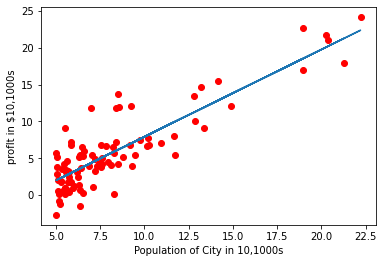

In [20]:
plotData(X[:,1], y)
plt.plot(X[:,1], np.dot(X,theta))
plt.show()

In [21]:
# test, given x = [1, 3.5]
predict1 = np.dot([1, 3.5], theta)
print('predict1 = ' + str(predict1*10000))
predict2 = np.dot([1, 7], theta)
print('predict2 = ' + str(predict2*10000))

predict1 = [2210.45952769]
predict2 = [43685.30910995]


Text(0, 0.5, 'Cost Function')

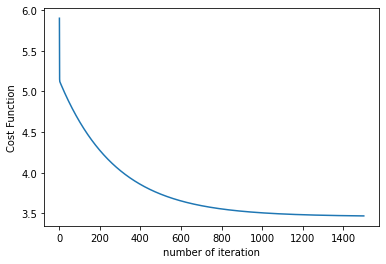

In [26]:
plt.plot(np.array(list(range(1,iterations+1))), J_history)
plt.xlabel('number of iteration')
plt.ylabel('Cost Function')